<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio Visualización

En este laboratorio usaremos el DataFrame de Netflix completo creado en los primeros laboratorios de Pandas. 

**Instrucciones:**

1. Lee cuidadosamente el enunciado de cada ejercicio.

2. Implementa la solución en la celda de código proporcionada.

3. Debes incluir después de cada gráfica la interpretación de las mismas en una celda de markdown. 

#### Ejercicio 1: ¿Cuántos títulos por tipo (Películas vs Series) tenemos?. En esta gráfica deberás: 

- Incluir un título. 

- Cambiar el nombre de los ejes X e Y. 

- Cambiar el color de las barras. 

In [60]:

df = pd.read_csv("../../labs/lab2_m2_pandas/datos/netflix_merge.csv",index_col=0)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'],
      dtype='object')

#### Ejercicio 2: ¿Cuál es la distribución de calificaciones (rating) en los títulos? En esta gráfica deberás:

- Mostrar los resultados ordenados de mayor a menor. 

- Rotar las etiquetas del eje X. 

- Quitar el nombre del eje X. 

- Cambiar el nombre del ehje Y. 

- Ponerle título a la gráfica. 



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'TV-14'),
  Text(2, 0, 'TV-PG'),
  Text(3, 0, 'R'),
  Text(4, 0, 'PG-13'),
  Text(5, 0, 'TV-Y7'),
  Text(6, 0, 'TV-Y'),
  Text(7, 0, 'PG'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'NR'),
  Text(10, 0, 'G'),
  Text(11, 0, 'TV-Y7-FV'),
  Text(12, 0, 'NC-17'),
  Text(13, 0, 'UR')])

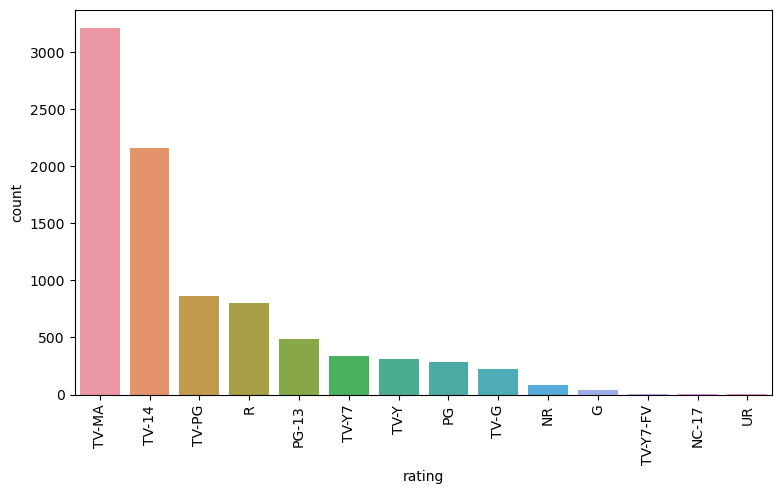

In [57]:
filtro = df["rating"].str.contains(r"-|nr|r|g|ur", case = False, na = False)
df_2 = df[filtro]["rating"].value_counts().reset_index()

plt.figure (figsize = (9,5))
sns.barplot(x="rating",
            y = "count",
            data = df_2)

plt.xticks(rotation = 90)


#### Ejercicio 3: ¿Cuál es el top 10 de países con más títulos disponibles? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 



In [63]:
df_3 = df.groupby("country")["title"].count().reset_index().sort_values(by = "title", ascending = False)
df_3
df_agrupado = df_3.head(10)

plt.figure (figsize = (9,5))
sns.barplot(x="title",
            y = "country",
            data = df_agrupado)

# cambiar el nombre del eje y
plt.ylabel("Países")
plt.xlabel("Títulos")
plt.title('Países con más títulos disponibles')
plt.xticks(rotation = 90)

,country,title
603,United States,2818
251,India,972
506,United Kingdom,419
319,Japan,245
435,South Korea,199
...,...,...
281,"Ireland, Canada, Luxembourg, United States, Un...",1
282,"Ireland, Canada, United Kingdom, United States",1
283,"Ireland, Canada, United States, United Kingdom",1
284,"Ireland, France, Iceland, United States, Mexic...",1


#### Ejercicio 5: ¿Cuál es la puntuación promedio de las películas según su calificación? Deberás:


- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 

- Cambia el tamaño de la gráfica a 15 x 5

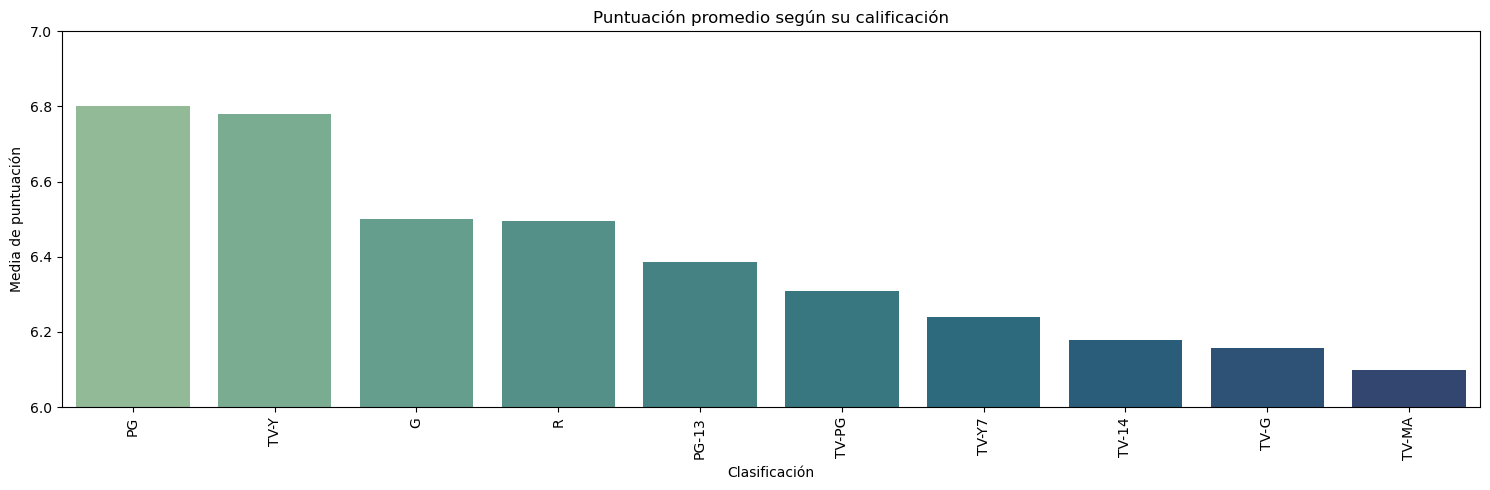

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

filtro_rating = df["rating"].str.contains(r"-|nr|r|g|ur", case=False, na=False)
filtro_imdb = df["IMDB Score"].notnull()

df_filtrado = df[filtro_rating & filtro_imdb]

df_filtrado = df_filtrado.groupby("rating")[["IMDB Score"]].mean().sort_values("IMDB Score", ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x=df_filtrado.index, 
            y="IMDB Score", 
            data=df_filtrado, 
            palette="crest")

plt.xlabel("Clasificación")
plt.ylabel("Media de puntuación")
plt.title("Puntuación promedio según su calificación")
plt.xticks(rotation=90)
plt.ylim(6, 7)
plt.tight_layout()


plt.show()


# He notado que los valores se encuentran entre 6 y 7 por lo que he cortado el valor y para que sea más representativo

#### Ejercicio 6: ¿Cuál es la relación entre la duración de las películas y su puntuación en IMDb? Deberás:

- Cambiar el tamaño de los puntos. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 


<Axes: xlabel='IMDB Score', ylabel='Runtime'>

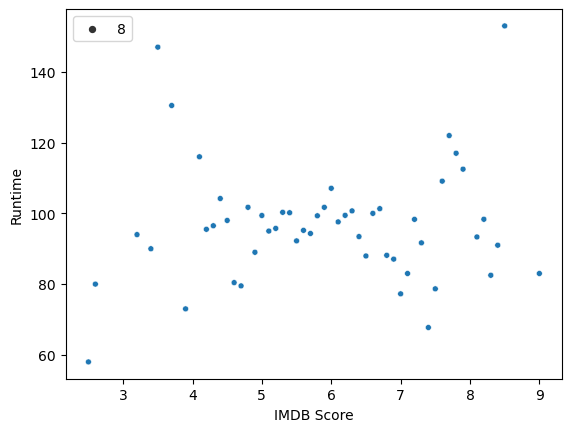

In [104]:
df_6 = df.groupby("IMDB Score")[["Runtime"]].mean().reset_index()

sns.scatterplot( x = "IMDB Score",
             y = "Runtime",
             data = df_6,
             size = 8 )

plt.ylabel("duración")
plt.xlabel("Puntuación IMDB")
plt.title("Busqieda de tendencia entre Score y runtime")
#No hay relación
#para un futuro trabajar con scipy

#### Ejercicio 7: ¿Cómo se distribuye la puntuación en IMDb según los 10 idiomas más usados? Deberás:

- Usa una gráfica que nos muestre la mediana y los cuartiles. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

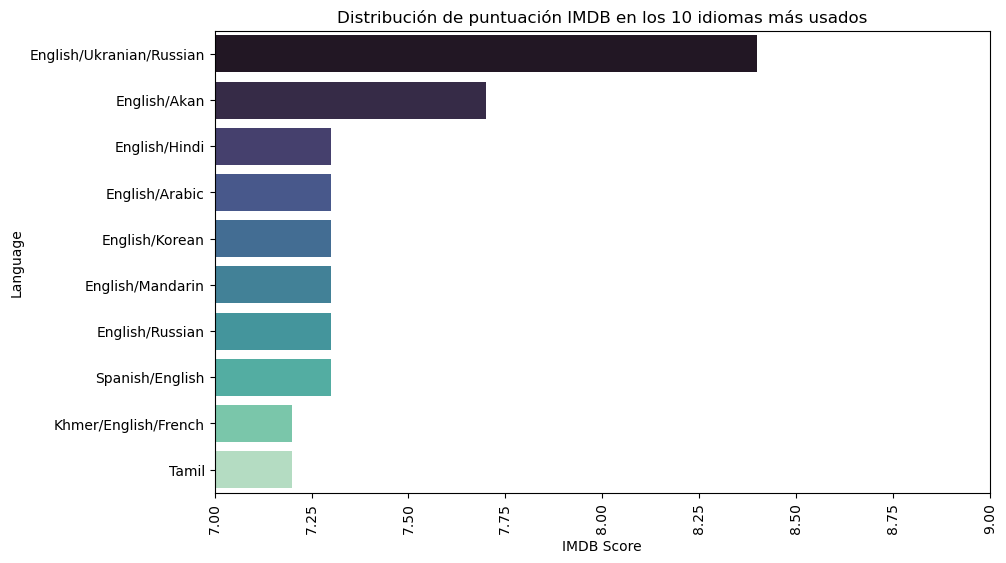

In [174]:
df_leng_mas_frecuente = df.groupby("Language")["IMDB Score"].mean().nlargest(10).reset_index()
df_leng_mas_frecuente

plt.figure(figsize=(10,6))
sns.barplot(x = "IMDB Score",
            y = "Language",
            data = df_leng_mas_frecuente,
            palette = "mako",)

plt.title("Distribución de puntuación IMDB en los 10 idiomas más usados", fontsize = 12)
plt.xlabel("IMDB Score")
plt.ylabel("Language")
plt.xlim(7,9)
plt.xticks(rotation = 90)

plt.show() #print de las gráficas

#### Ejercicio 8: ¿Cuáles son los 10 directores que tienen las puntuaciones más altas?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Cambiar el tamaño de la gráfica. 



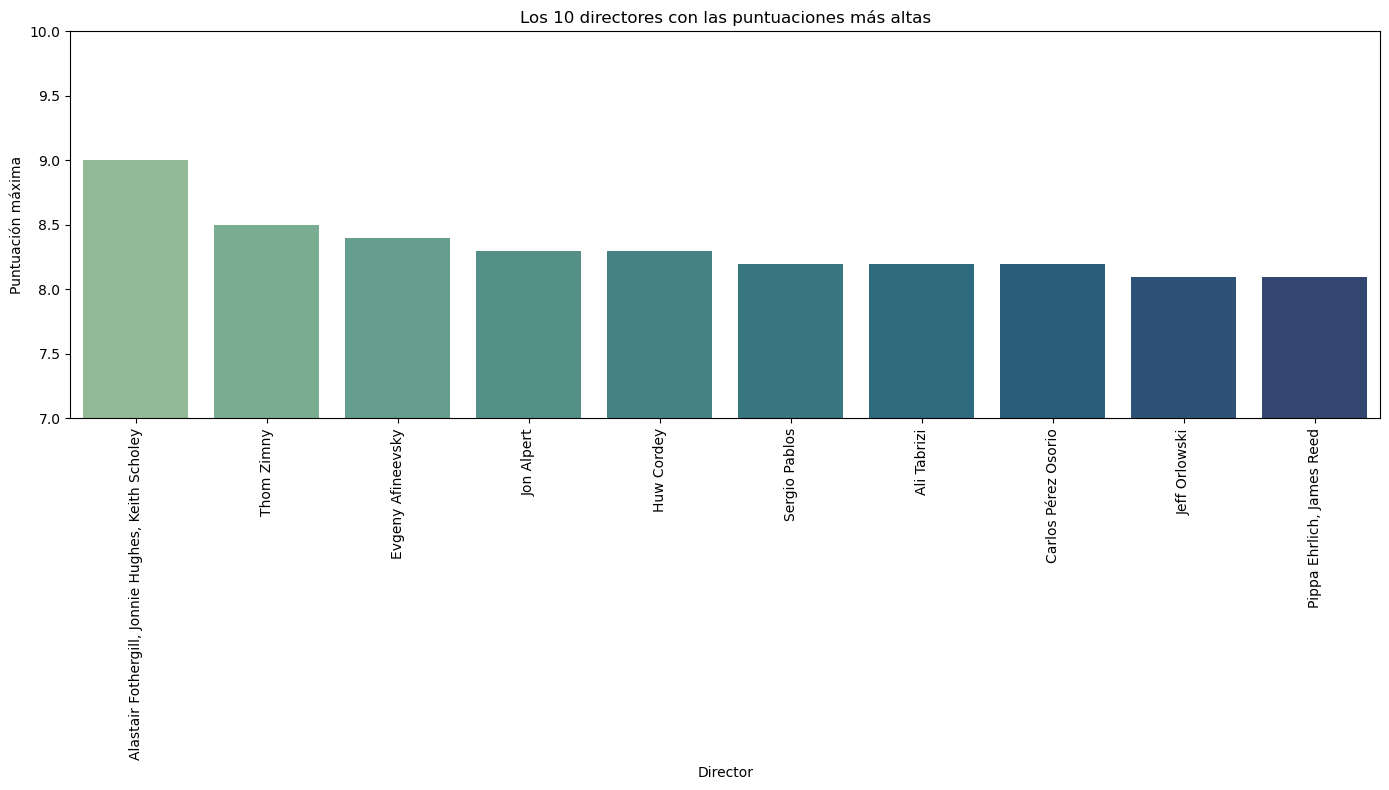

In [108]:

df_agrupado = df.groupby("director")[["IMDB Score"]].max().reset_index().sort_values("IMDB Score", ascending=False).nlargest(10, "IMDB Score")
plt.figure(figsize=(14,8))
sns.barplot(x = "director",
            y="IMDB Score",
            data=df_agrupado,
            palette="crest")
plt.xlabel("Director")
plt.ylabel("Puntuación máxima")
plt.title("Los 10 directores con las puntuaciones más altas")
plt.xticks(rotation=90)
plt.ylim(7,10)
plt.tight_layout()

# He hecho igual que en el ejercicio 5. He notado que los valores se encuentran entre 8 y 10 por lo que he cortado el valor y para que sea más representativo. Pero por si acaso he cortado en 7 para evitar perder información

#### Ejercicio 9:  ¿Cuál es la distribución de títulos por tipo y calificación? Soluciona este ejercicio usando subplots. Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 


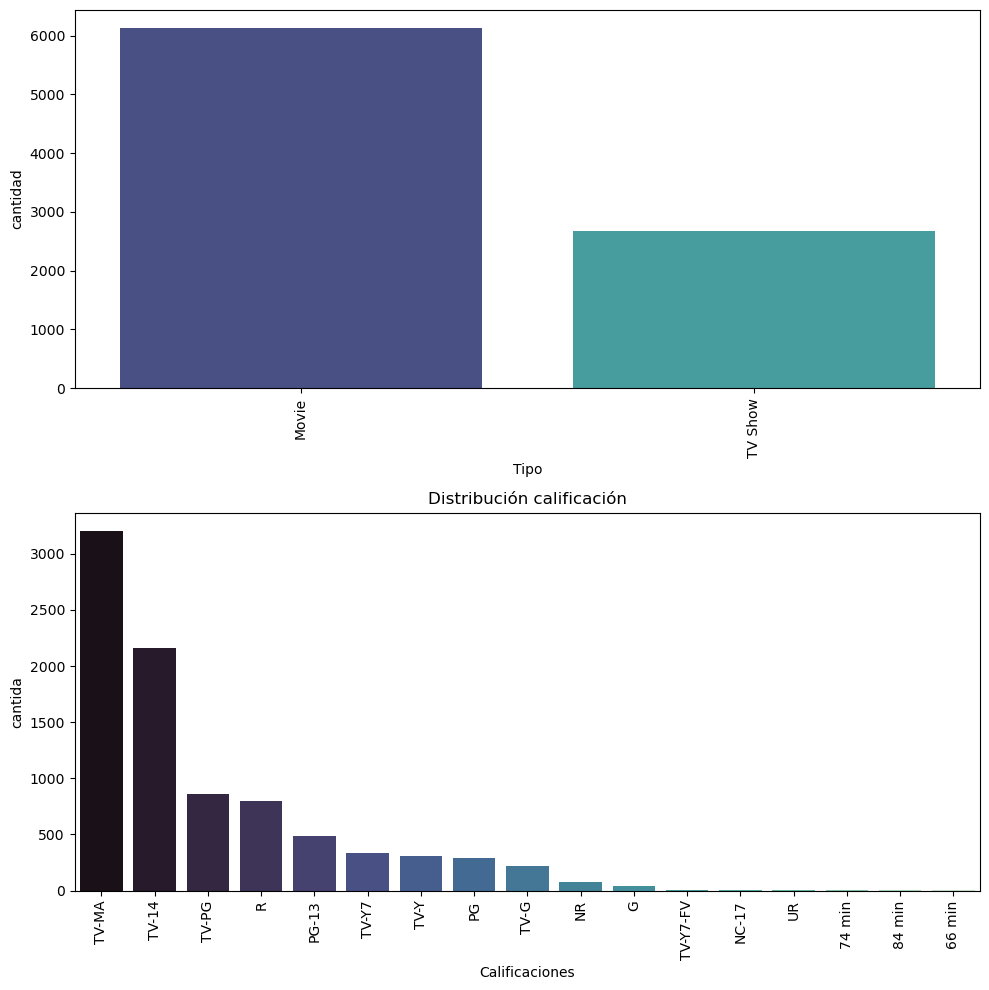

In [285]:
df_rating = df['rating'].value_counts().reset_index()

fig, axes = plt.subplots(2, 1, figsize = (10, 10))

sns.countplot(x = "type",
              data = df,
              palette = "mako",
              ax = axes[0]
              );

sns.barplot(x = "rating",
            y = "count",
            data = df_rating,
            palette = "mako",
            ax = axes[1]
            );

axes[0].set_xlabel("Tipo")
axes[0].set_ylabel("cantidad")
axes[0].tick_params(axis = "x", labelrotation = 90)

axes[1].tick_params(axis = 'x',labelrotation = 90)
axes[1].set_title("Distribución calificación")
axes[1].set_xlabel("Calificaciones")
axes[1].set_ylabel("cantida")

plt.tight_layout()

#### En el ejercicio 10, tenemos que sacar el numero de pelis y series (el tipo) para los 6 principales paises, mostrando cada pais en un subplot.
- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 



IndexError: index 2 is out of bounds for axis 0 with size 2

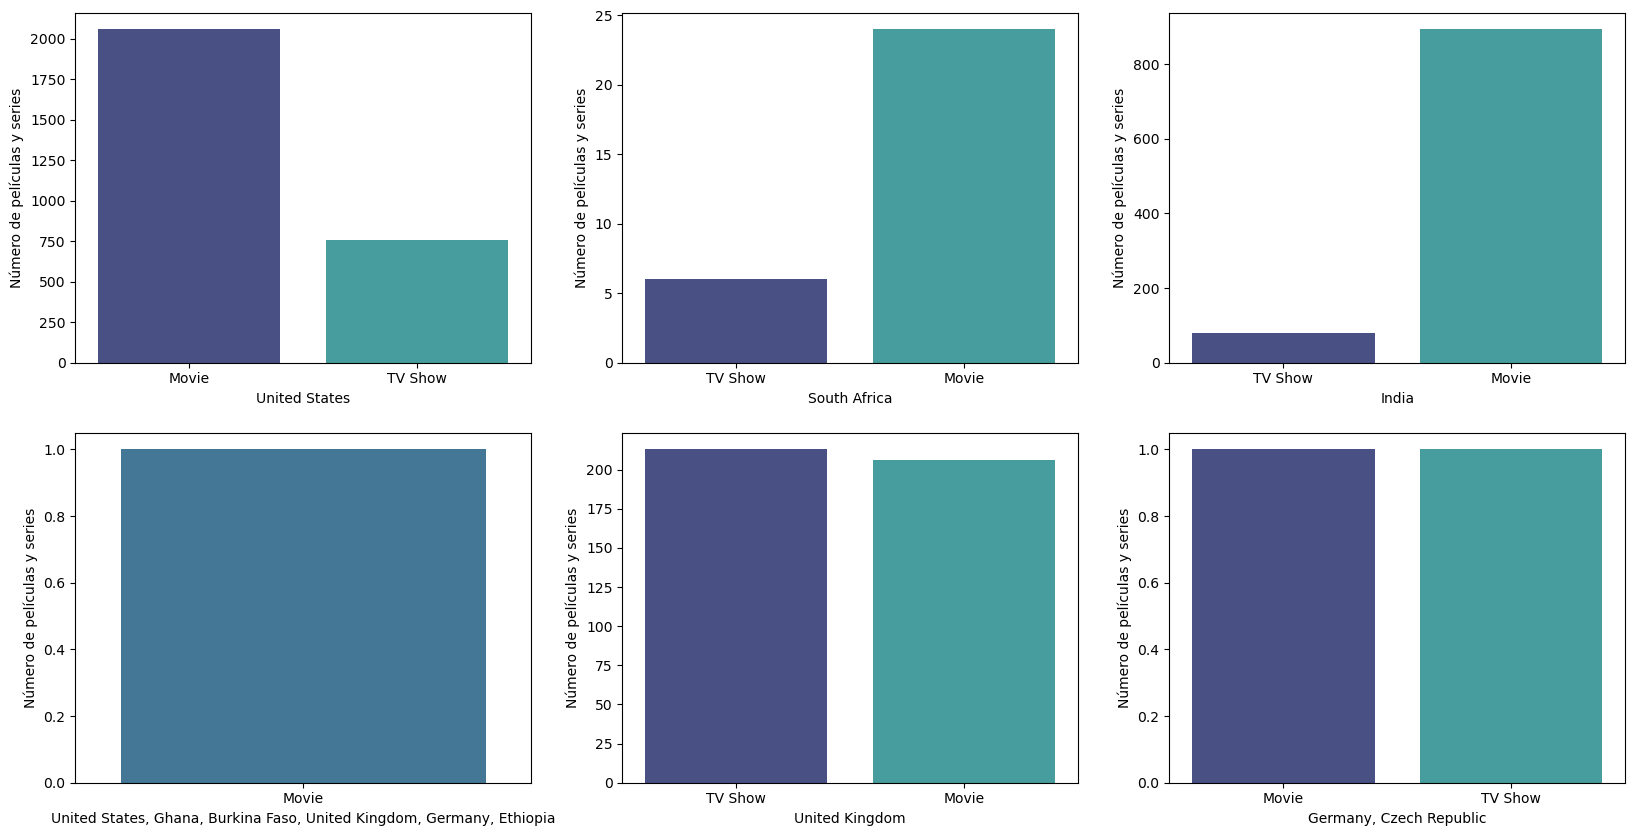

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la lista única de países
lista_paises = df["country"].unique()

# Crear una figura con una cuadrícula de 2x3 subparcelas
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Inicializar el contador de bucles
bucle = 0

# Iterar sobre los países seleccionados
for pais in lista_paises:
    
    # Filtrar el DataFrame por país
    df_paises = df[df["country"] == pais]
    
    # Si el DataFrame está vacío para ese país, continuar con el siguiente
    if df_paises.empty:
        continue
    
    # Calcular las posiciones de la cuadrícula
    i = bucle // 3  # Fila (división entera)
    j = bucle % 3   # Columna (resto)
    
    # Crear un gráfico de conteo para el tipo de contenido por país
    sns.countplot(x="type", data=df_paises, palette="mako", ax=axes[i, j])
    
    # Asignar etiquetas a los ejes
    axes[i, j].set_xlabel(pais)
    axes[i, j].set_ylabel("Número de películas y series")
    
    # Aumentar el contador de bucle
    bucle += 1

# Ajustar el diseño para evitar superposición de etiquetas
plt.tight_layout()

# Mostrar la figura
plt.show()


#Revisaaar

#### Ejercicio 11: ¿Cuál es total de tipos de calificaciones, considerando solo los principales 5 países? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

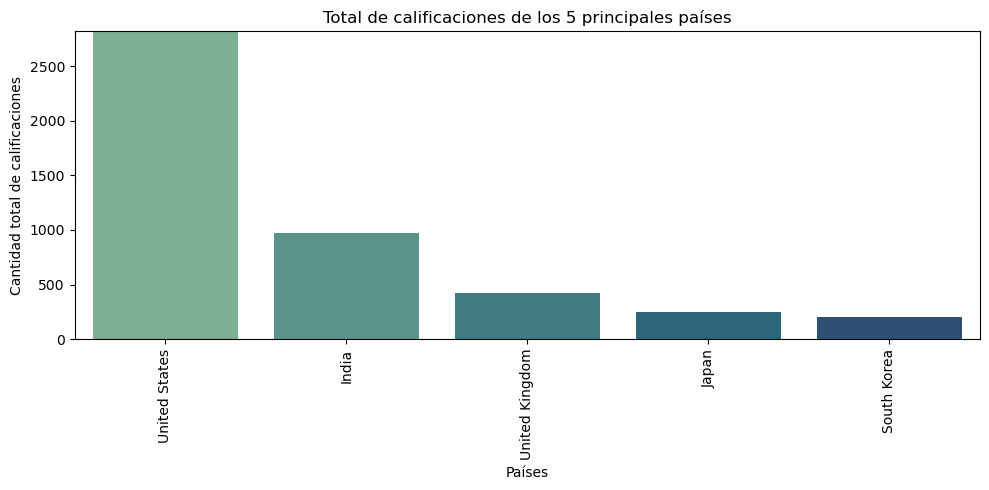

In [290]:


# Agrupar por país y contar las calificaciones
df_agrupado = df.groupby("country")[["rating"]].count().nlargest(5, columns="rating")

# Resetear el índice para que "country" sea una columna
df_agrupado = df_agrupado.reset_index()

# Crear una figura para el gráfico
plt.figure(figsize=(10, 5))


sns.barplot(x="country",
            y="rating",
            data=df_agrupado,
            palette="crest")


plt.title("Total de calificaciones de los 5 principales países")
plt.xlabel("Países")
plt.ylabel("Cantidad total de calificaciones")
plt.xticks(rotation=90)


plt.ylim(0, df_agrupado["rating"].max() + 1)  
plt.tight_layout()
plt.show()


#### Ejercicio 12: ¿Cómo se distribuyen las 5 primeras calificaciones  a lo largo de los aúltimo 10 años? 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

c:\Users\Víctor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Víctor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


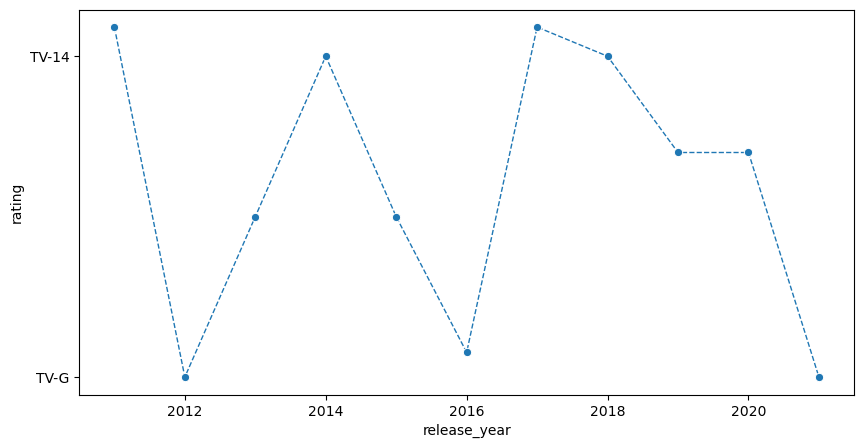

In [253]:
filtro_rating = df["rating"].str.contains(r"-|nr|r|g|ur", case=False, na=False)

filtro_yr = df["release_year"].between(2011,2021,inclusive = "both")

df[filtro_rating & filtro_yr].groupby(["rating","release_year"])["title"].count()


df_filtrado = df[filtro_rating & filtro_yr].groupby(["rating","release_year"])[["title"]].count()

plt.figure(figsize=(10,5))
sns.lineplot(x="release_year",
             y="rating",
             data=df_filtrado,
             errorbar= None,
             linewidth = 1,
             linestyle = "dashed", 
             marker = "o");


### BONUS

#### Ejercicio 13: ¿Cómo ha evolucionado la cantidad de títulos añadidos a lo largo de los años diferenciando entre Películas y Series?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

- Añade una *grid* al gráfico. 

#### Ejercicio 14: ¿Cómo se distribuyen los títulos según su calificación (rating)? Utiliza un gráfico de “quesitos” para visualizar la proporción de títulos en cada categoría de calificación.

#### Ejercicio 15: ¿Cómo se distribuyen los títulos según su calificación (rating) y tipo (Películas vs Series)? Utiliza un gráfico countplot con el parámetro hue para diferenciar entre películas y series en cada calificación.